In [1]:
%matplotlib inline

In [79]:
import netCDF4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(color_codes=True)

In [85]:
def plot_density(data, title=''):
    ax = plt.axes()
    ax.set_title(title)
    sns.distplot(data)
    plt.show()
    
def plot_density_2d(data, title=''):
    print('Plotting density 2d ...')

    cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', ['orange', 'black', 'white'], 256)
    img = plt.imshow(data, origin='lower', interpolation='quadric', cmap=cmap, aspect='auto')
    plt.colorbar(img, cmap=cmap)
    plt.title(title)
    plt.show()

In [3]:
data = netCDF4.Dataset('data/G10010_SIBT1850_v1.1.nc', 'r', format='NETCDF4')

In [4]:
data.variables

OrderedDict([(u'latitude', <type 'netCDF4._netCDF4.Variable'>
              float32 latitude(latitude)
                  standard_name: latitude
                  long_name: latitude
                  units: degrees
                  axis: Y
              unlimited dimensions: 
              current shape = (240,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'longitude', <type 'netCDF4._netCDF4.Variable'>
              float32 longitude(longitude)
                  standard_name: longitude
                  long_name: longitude
                  units: degrees
                  axis: X
              unlimited dimensions: 
              current shape = (1440,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'seaice_conc', <type 'netCDF4._netCDF4.Variable'>
              float32 seaice_conc(time, latitude, longitude)
                  short_name: concentration
                  long_name: Sea_Ice_Concentra

In [5]:
print('Shape latitude: ', data['latitude'][:].shape)
print('Shape longitude: ', data['longitude'][:].shape)
print('Shape time: ', data['time'][:].shape)
print('Shape seaice_conc: ', data['seaice_conc'][:].shape)
print('Shape seaice_source: ', data['seaice_source'][:].shape)

('Shape latitude: ', (240,))
('Shape longitude: ', (1440,))
('Shape time: ', (1968,))
('Shape seaice_conc: ', (1968, 240, 1440))
('Shape seaice_source: ', (1968, 240, 1440))


In [6]:
data['seaice_conc'][:].shape

(1968, 240, 1440)

In [7]:
data['longitude'][:]

array([  1.25000000e-01,   3.75000000e-01,   6.25000000e-01, ...,
         3.59375000e+02,   3.59625000e+02,   3.59875000e+02], dtype=float32)

In [59]:
time = data['time'][:]
longitude = data['longitude'][:]
latitude = data['latitude'][:]
seaice_con = data['seaice_conc'][:]
print(longitude[:5])
print(latitude[:5])
print(seaice_con[0,0,:5])

[ 0.125  0.375  0.625  0.875  1.125]
[ 89.875  89.625  89.375  89.125  88.875]
[ 99.26139832  99.26138306  99.26138306  99.26136017  99.26136017]


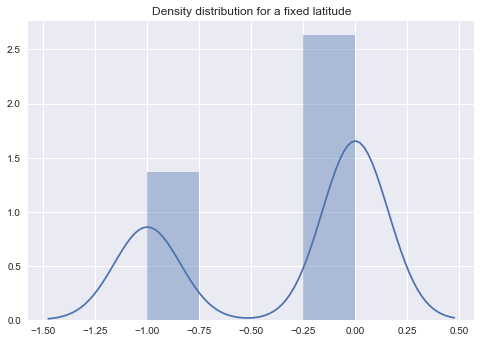

In [77]:
d = [min(x, 0) for x in seaice_con[0, :, 0]]
plot_density(d, title='Density distribution for a fixed latitude')

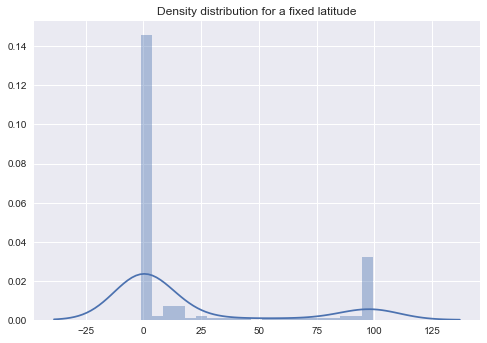

In [89]:
plot_density(seaice_con[0, :, 0], title='Density distribution for a fixed latitude')

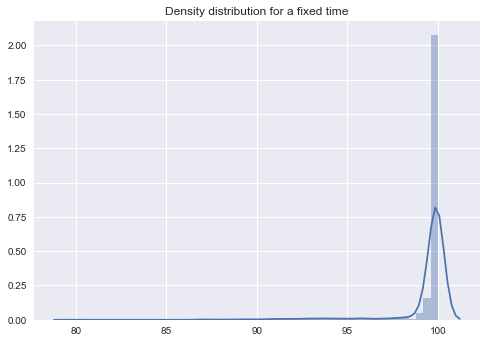

In [75]:
plot_density(seaice_con[:, 0, 0], title='Density distribution for a fixed time')

Plotting density 2d ...


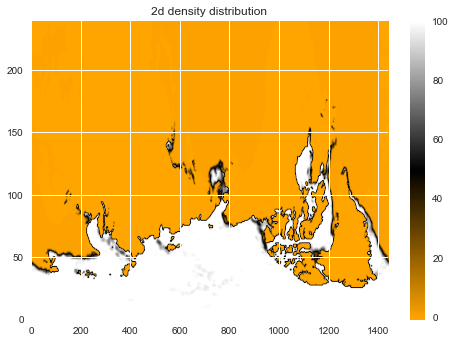

In [96]:
plot_density_2d(seaice_con[1900, :, :], title='2d density distribution')

In [124]:
# Compute long/lat pairs
X = []
y = []
"""
for t in range(3):
    for i in range(len(latitude)):
        for j in range(len(longitude)):
            X+=[[time[t], latitude[i], longitude[j]]]
            y+=seaice_con[t, i, j]"""
for i in range(len(latitude)):
    for j in range(len(longitude)):
        X+=[[seaice_con[1, i, j], latitude[i], longitude[j]]]

X = np.array(X)
y = np.array(y)

print(X.shape)

dbs = sklearn.cluster.DBSCAN(eps=0.25,
                            min_samples=5,
                            metric='euclidean',
                            algorithm='auto',
                            leaf_size=30,
                            p=None,
                            n_jobs=1)

# for i in range(1): # range(len(time))
    #time_point = time[i]
s = dbs.fit_predict(X=X) # , y=y
# print(counter)
print(s)
counter = Counter(s)
print(counter)

(345600, 3)
[ -1  -1  -1 ..., 142 142  -1]
Counter({-1: 99444, 21: 86857, 76: 43311, 45: 40184, 55: 31616, 2: 10591, 1: 5981, 26: 5513, 128: 3418, 4: 2792, 5: 1930, 141: 1486, 44: 1241, 110: 1139, 0: 951, 142: 724, 117: 676, 115: 587, 87: 468, 136: 432, 13: 379, 37: 335, 68: 331, 80: 284, 32: 263, 105: 251, 18: 226, 57: 215, 94: 204, 123: 191, 9: 186, 28: 175, 124: 169, 49: 167, 34: 153, 48: 143, 70: 135, 38: 132, 47: 127, 140: 118, 112: 117, 36: 87, 30: 78, 14: 75, 145: 74, 3: 70, 101: 68, 16: 56, 24: 55, 58: 54, 135: 52, 17: 50, 114: 50, 139: 49, 118: 46, 146: 42, 27: 38, 63: 38, 111: 38, 22: 34, 84: 34, 75: 32, 129: 31, 74: 30, 19: 29, 43: 29, 66: 27, 29: 26, 120: 26, 148: 26, 98: 24, 61: 23, 100: 22, 39: 21, 131: 21, 20: 20, 33: 18, 42: 17, 72: 17, 106: 16, 25: 15, 73: 14, 130: 14, 97: 13, 8: 11, 11: 11, 12: 11, 15: 11, 46: 11, 51: 11, 77: 11, 138: 11, 7: 10, 62: 10, 65: 10, 35: 9, 31: 8, 40: 8, 52: 8, 90: 8, 93: 8, 132: 8, 54: 6, 127: 6, 137: 6, 6: 5, 10: 5, 53: 5, 59: 5, 64: 5, 6

Plotting density 2d ...


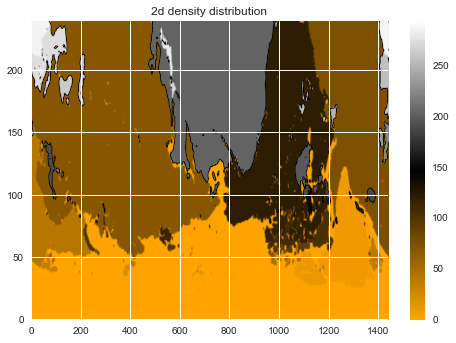

In [123]:
s = np.reshape(s, (len(latitude), len(longitude)))
plot_density_2d(s, title='2d density distribution')